# CUSTOMER SEGMENTATION

#### By Sneha Prasad

# Dataset Description

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

#### Attributes

People

ID: Customer's unique identifier\
Year_Birth: Customer's birth year\
Education: Customer's education level\
Marital_Status: Customer's marital status\
Income: Customer's yearly household income\
Kidhome: Number of children in customer's household\
Teenhome: Number of teenagers in customer's household\
Dt_Customer: Date of customer's enrollment with the company\
Recency: Number of days since customer's last purchase\
Complain: 1 if the customer complained in the last 2 years, 0 otherwise\

Products

MntWines: Amount spent on wine in last 2 years\
MntFruits: Amount spent on fruits in last 2 years\
MntMeatProducts: Amount spent on meat in last 2 years\
MntFishProducts: Amount spent on fish in last 2 years\
MntSweetProducts: Amount spent on sweets in last 2 years\
MntGoldProds: Amount spent on gold in last 2 years\

Promotion

NumDealsPurchases: Number of purchases made with a discount\
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise\
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise\
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise\
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise\
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise\
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise\

Place

NumWebPurchases: Number of purchases made through the company’s website\
NumCatalogPurchases: Number of purchases made using a catalogue\
NumStorePurchases: Number of purchases made directly in stores\
NumWebVisitsMonth: Number of visits to company’s website in the last month\

# Importing Libraries

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# Loading Data

In [77]:
df=pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

# Data Analysis

In [78]:
df.shape

(2240, 29)

In [79]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [80]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [81]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [82]:
df.Dt_Customer=pd.to_datetime(df.Dt_Customer).dt.date

# Preprocessing

In [83]:
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Together", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [84]:
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [85]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [86]:
df['Age']=2023-df.Year_Birth

In [87]:
df.drop(['ID','Year_Birth',"Kidhome","Teenhome",'Dt_Customer','Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [88]:
df.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Children                0
Age                     0
dtype: int64

In [89]:
df.Income.fillna(df.Income.median(),inplace=True)

In [90]:
df

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0         Graduate          Alone  58138.0       58       635         88   
1         Graduate          Alone  46344.0       38        11          1   
2         Graduate       Together  71613.0       26       426         49   
3         Graduate       Together  26646.0       26        11          4   
4     Postgraduate       Together  58293.0       94       173         43   
...            ...            ...      ...      ...       ...        ...   
2235      Graduate       Together  61223.0       46       709         43   
2236  Postgraduate       Together  64014.0       56       406          0   
2237      Graduate          Alone  56981.0       91       908         48   
2238  Postgraduate       Together  69245.0        8       428         30   
2239  Postgraduate       Together  52869.0       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2                 1             6  ...   
2                 127              111                21            42  ...   
3                  20               10                 3             5  ...   
4                 118               46                27            15  ...   
...               ...              ...               ...           ...  ...   
2235              182               42               118           247  ...   
2236               30                0                 0             8  ...   
2237              217               32                12            24  ...   
2238              214               80                30            61  ...   
2239               61                2                 1            21  ...   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Children  Age  
0                0             0         0         1         0   66  
1                0             0         0         0         2   69  
2                0             0         0         0         0   58  
3                0             0         0         0         1   39  
4                0             0         0         0         1   42  
...            ...           ...       ...       ...       ...  ...  
2235             0             0         0         0         1   56  
2236             1             0         0         0         3   77  
2237             0             0         0         0         0   42  
2238             0             0         0         0         1   67  
2239             0             0         0         1         2   69  

[2240 rows x 24 columns]

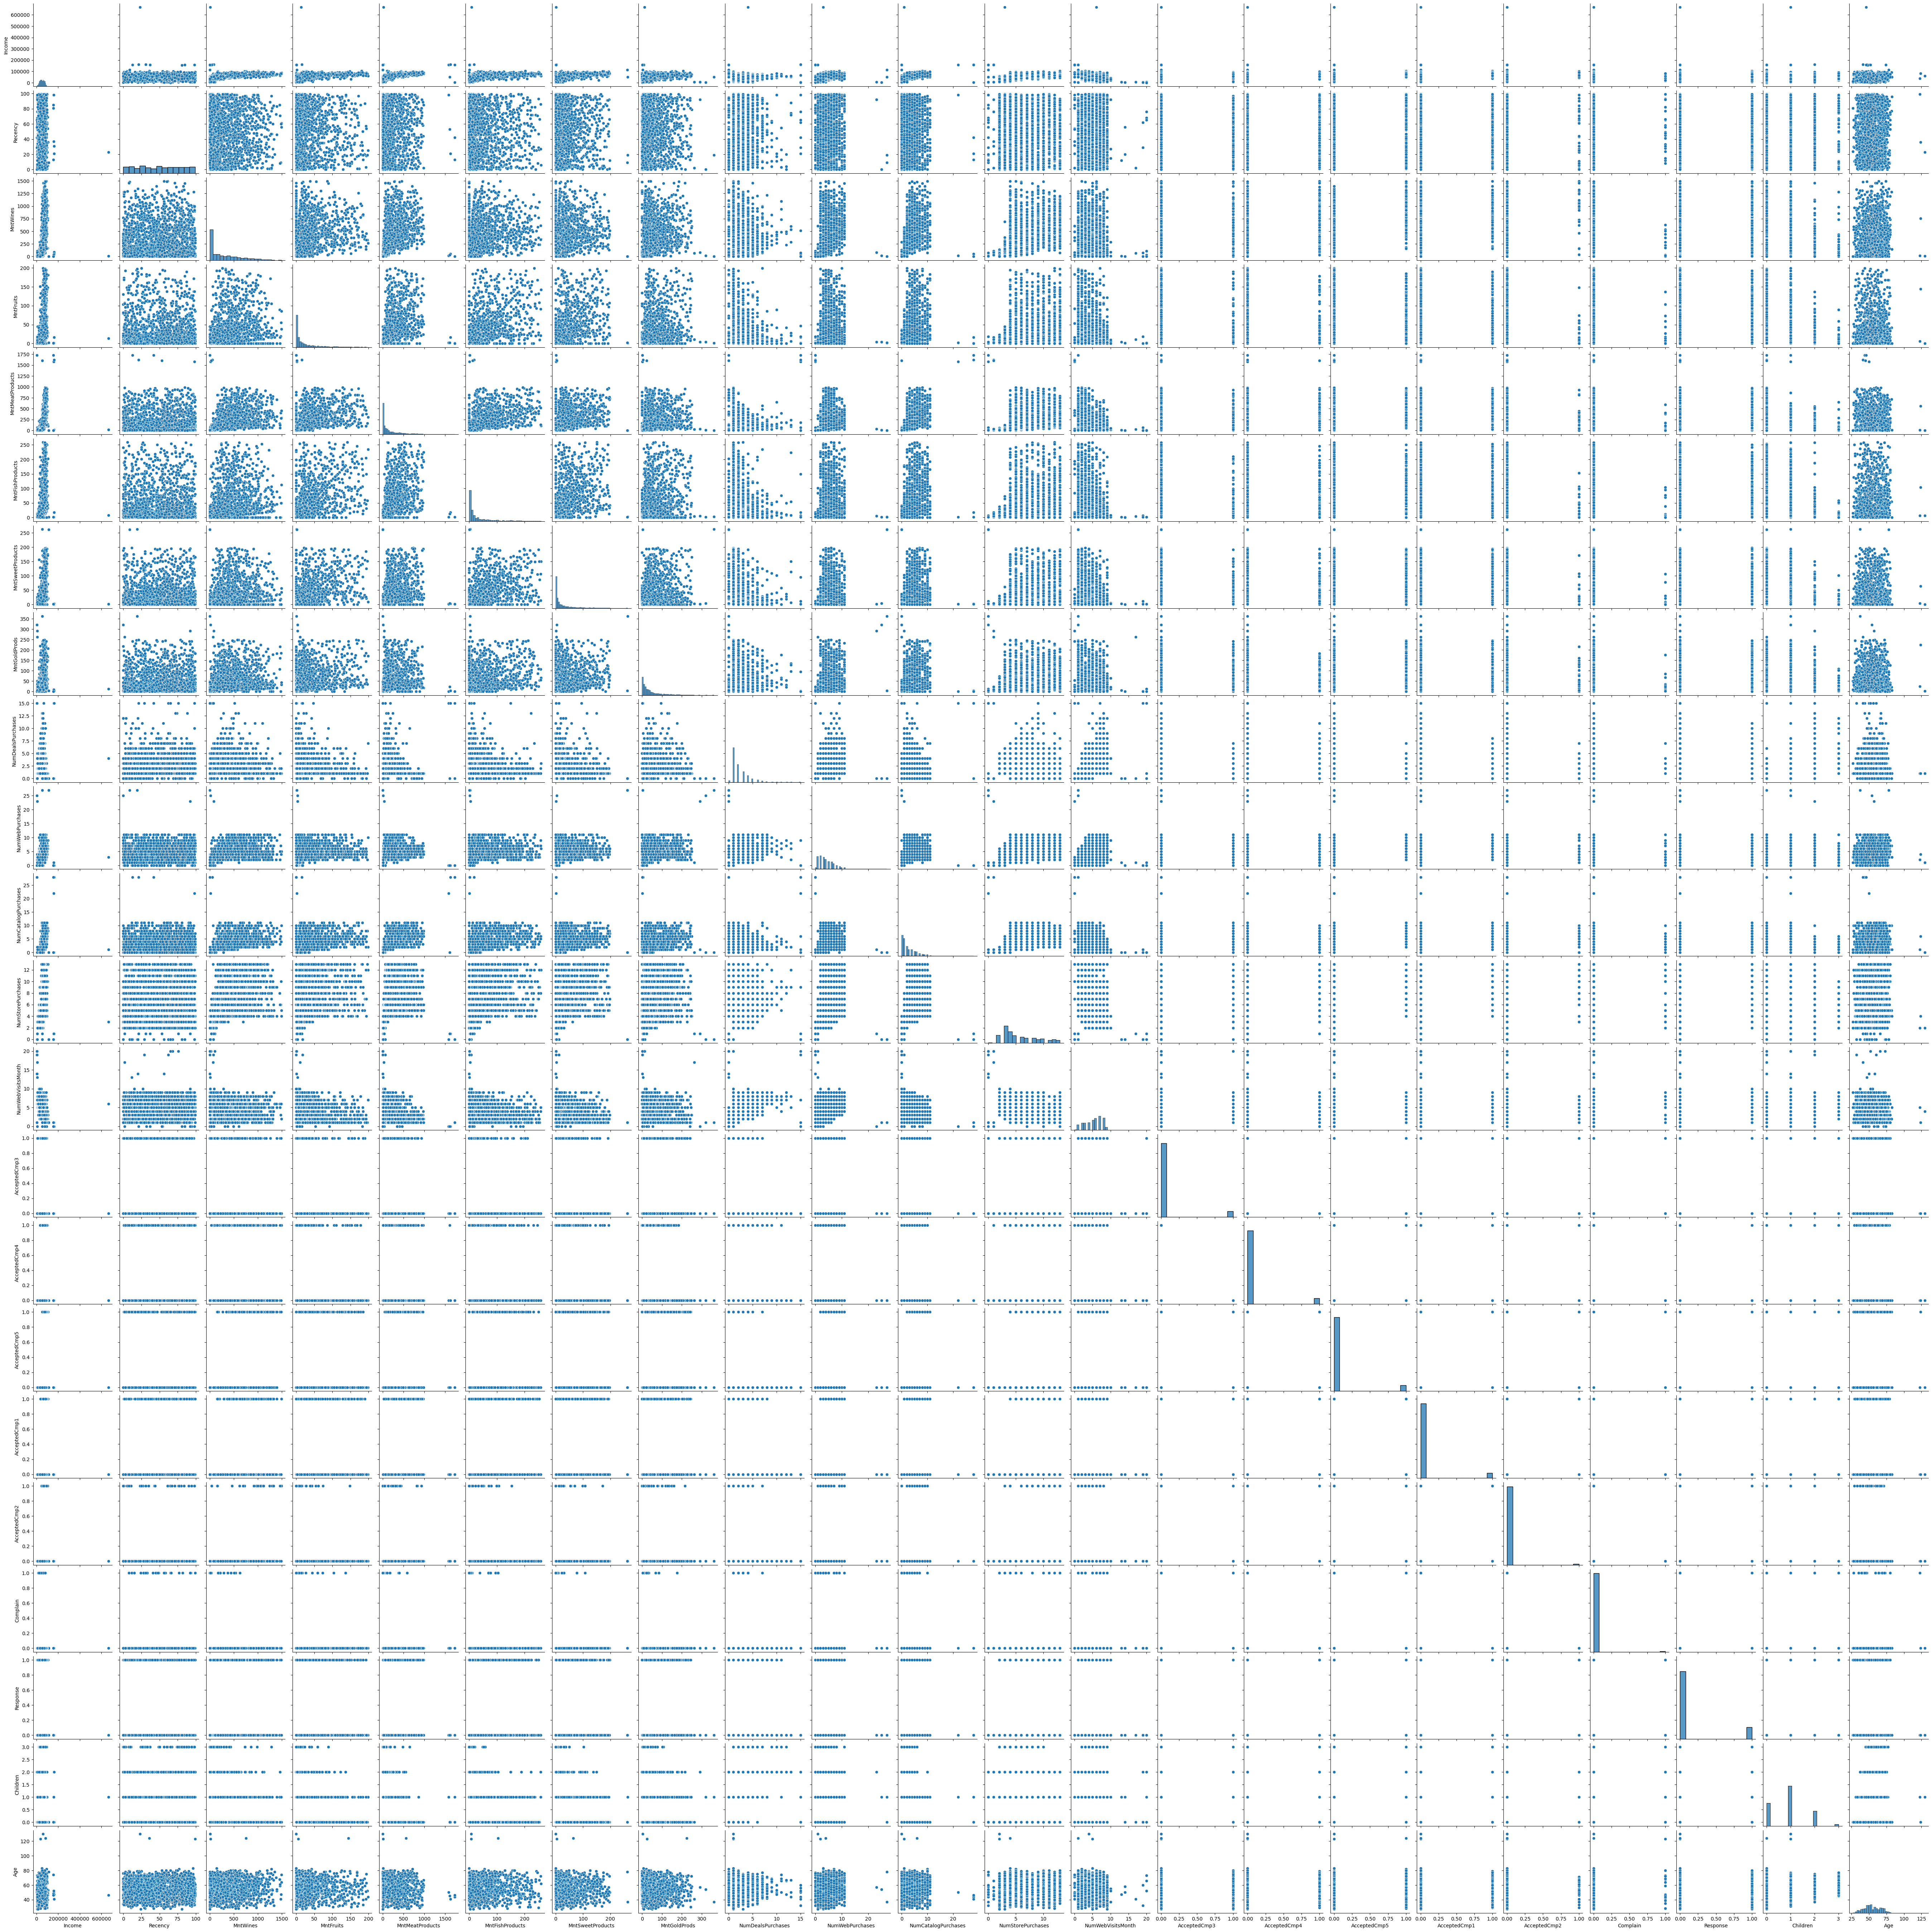

In [102]:
sns.pairplot(df)

<Axes: >

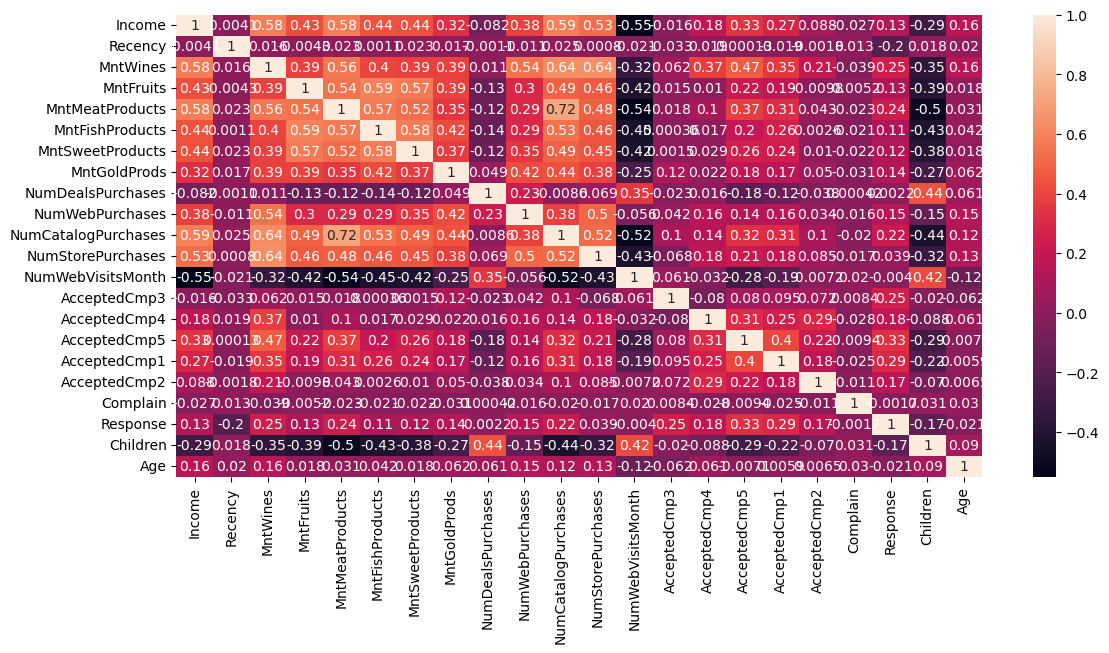

In [97]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(),annot=True)

There is presence of multicolinearity

In [98]:
df

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0         Graduate          Alone  58138.0       58       635         88   
1         Graduate          Alone  46344.0       38        11          1   
2         Graduate       Together  71613.0       26       426         49   
3         Graduate       Together  26646.0       26        11          4   
4     Postgraduate       Together  58293.0       94       173         43   
...            ...            ...      ...      ...       ...        ...   
2235      Graduate       Together  61223.0       46       709         43   
2236  Postgraduate       Together  64014.0       56       406          0   
2237      Graduate          Alone  56981.0       91       908         48   
2238  Postgraduate       Together  69245.0        8       428         30   
2239  Postgraduate       Together  52869.0       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2                 1             6  ...   
2                 127              111                21            42  ...   
3                  20               10                 3             5  ...   
4                 118               46                27            15  ...   
...               ...              ...               ...           ...  ...   
2235              182               42               118           247  ...   
2236               30                0                 0             8  ...   
2237              217               32                12            24  ...   
2238              214               80                30            61  ...   
2239               61                2                 1            21  ...   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Children  Age  
0                0             0         0         1         0   66  
1                0             0         0         0         2   69  
2                0             0         0         0         0   58  
3                0             0         0         0         1   39  
4                0             0         0         0         1   42  
...            ...           ...       ...       ...       ...  ...  
2235             0             0         0         0         1   56  
2236             1             0         0         0         3   77  
2237             0             0         0         0         0   42  
2238             0             0         0         0         1   67  
2239             0             0         0         1         2   69  

[2240 rows x 24 columns]

#  Data Preprocessing 

In [103]:
df_num=df.select_dtypes(np.number)
df_cat=df.select_dtypes(object)

In [105]:
#Encoding
df=pd.get_dummies(df,['Education', 'Marital_Status'],drop_first=True)

In [106]:
df

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     58138.0       58       635         88              546              172   
1     46344.0       38        11          1                6                2   
2     71613.0       26       426         49              127              111   
3     26646.0       26        11          4               20               10   
4     58293.0       94       173         43              118               46   
...       ...      ...       ...        ...              ...              ...   
2235  61223.0       46       709         43              182               42   
2236  64014.0       56       406          0               30                0   
2237  56981.0       91       908         48              217               32   
2238  69245.0        8       428         30              214               80   
2239  52869.0       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0                   88            88                  3                8  ...   
1                    1             6                  2                1  ...   
2                   21            42                  1                8  ...   
3                    3             5                  2                2  ...   
4                   27            15                  5                5  ...   
...                ...           ...                ...              ...  ...   
2235               118           247                  2                9  ...   
2236                 0             8                  7                8  ...   
2237                12            24                  1                2  ...   
2238                30            61                  2                6  ...   
2239                 1            21                  3                3  ...   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Children  \
0                0             0             0         0         1         0   
1                0             0             0         0         0         2   
2                0             0             0         0         0         0   
3                0             0             0         0         0         1   
4                0             0             0         0         0         1   
...            ...           ...           ...       ...       ...       ...   
2235             0             0             0         0         0         1   
2236             0             1             0         0         0         3   
2237             0             0             0         0         0         0   
2238             0             0             0         0         0         1   
2239             0             0             0         0         1         2   

      Age  Education_Postgraduate  Education_Undergraduate  \
0      66                       0                        0   
1      69                       0                        0   
2      58                       0                        0   
3      39                       0                        0   
4      42                       1                        0   
...   ...                     ...                      ...   
2235   56                       0                        0   
2236   77                       1                        0   
2237   42                       0                        0   
2238   67                       1                        0   
2239   69                       1                        0   

      Marital_Status_Together  
0                           0  
1                           0  
2                           1  
3                           1  
4                           1  
...                       ...  
2235                        1  
2236                        1  
2237                        0  
2238                        1  
223

In [ ]:
df_scaled

In [107]:
sc=StandardScaler()
df_scaled=pd.DataFrame(sc.fit_transform(df), columns=df.columns)

In [108]:
df_scaled

Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0     0.235696  0.307039  0.983781   1.551577         1.679702   
1    -0.235454 -0.383664 -0.870479  -0.636301        -0.713225   
2     0.773999 -0.798086  0.362723   0.570804        -0.177032   
3    -1.022355 -0.798086 -0.870479  -0.560857        -0.651187   
4     0.241888  1.550305 -0.389085   0.419916        -0.216914   
...        ...       ...       ...        ...              ...   
2235  0.358936 -0.107383  1.203678   0.419916         0.066692   
2236  0.470432  0.237969  0.303291  -0.661449        -0.606873   
2237  0.189476  1.446700  1.795020   0.545656         0.221789   
2238  0.679401 -1.419719  0.368666   0.092992         0.208495   
2239  0.025208 -0.314594 -0.653555  -0.586005        -0.469501   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0            2.462147          1.476500      0.843207           0.349414   
1           -0.650449         -0.631503     -0.729006          -0.168236   
2            1.345274         -0.146905     -0.038766          -0.685887   
3           -0.503974         -0.583043     -0.748179          -0.168236   
4            0.155164         -0.001525     -0.556446           1.384715   
...               ...               ...           ...                ...   
2235         0.081926          2.203398      3.891766          -0.168236   
2236        -0.687068         -0.655733     -0.690659           2.420015   
2237        -0.101168         -0.364974     -0.383886          -0.685887   
2238         0.777683          0.071165      0.325527          -0.168236   
2239        -0.650449         -0.631503     -0.441406           0.349414   

      NumWebPurchases  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0            1.409304  ...      -0.28014     -0.262111      -0.11651   
1           -1.110409  ...      -0.28014     -0.262111      -0.11651   
2            1.409304  ...      -0.28014     -0.262111      -0.11651   
3           -0.750450  ...      -0.28014     -0.262111      -0.11651   
4            0.329427  ...      -0.28014     -0.262111      -0.11651   
...               ...  ...           ...           ...           ...   
2235         1.769263  ...      -0.28014     -0.262111      -0.11651   
2236         1.409304  ...      -0.28014      3.815174      -0.11651   
2237        -0.750450  ...      -0.28014     -0.262111      -0.11651   
2238         0.689386  ...      -0.28014     -0.262111      -0.11651   
2239        -0.390491  ...      -0.28014     -0.262111      -0.11651   

      Complain  Response  Children       Age  Education_Postgraduate  \
0    -0.097282  2.388846 -1.264505  0.985345               -0.786446   
1    -0.097282 -0.418612  1.396361  1.235733               -0.786446   
2    -0.097282 -0.418612 -1.264505  0.317643               -0.786446   
3    -0.097282 -0.418612  0.065928 -1.268149               -0.786446   
4    -0.097282 -0.418612  0.065928 -1.017761                1.271543   
...        ...       ...       ...       ...                     ...   
2235 -0.097282 -0.418612  0.065928  0.150717               -0.786446   
2236 -0.097282 -0.418612  2.726794  1.903435                1.271543   
2237 -0.097282 -0.418612 -1.264505 -1.017761               -0.786446   
2238 -0.097282 -0.418612  0.065928  1.068807                1.271543   
2239 -0.097282  2.388846  1.396361  1.235733                1.271543   

      Education_Undergraduate  Marital_Status_Together  
0                   -0.360002                -1.346874  
1                   -0.360002                -1.346874  
2                   -0.360002                 0.742460  
3                   -0.360002                 0.742460  
4                   -0.360002                 0.742460  
...                       ...                      ...  
2235                -0.360002                 0.742460  
2236                -0.360002                 0.742460  
2237                -0.360002                -1.346874  
22

In [110]:
pca=PCA(n_components=3)
PCA_ds = pd.DataFrame(pca.fit_transform(df_scaled), columns=(["PC0","PC1", "PC2"]))
PCA_ds.describe()

PC0           PC1           PC2
count  2.240000e+03  2.240000e+03  2.240000e+03
mean  -2.601094e-16  7.612958e-17 -8.247371e-17
std    2.535831e+00  1.409814e+00  1.341441e+00
min   -5.178605e+00 -3.922115e+00 -4.846574e+00
25%   -2.234962e+00 -8.750708e-01 -8.672935e-01
50%   -8.040677e-01 -1.129895e-01 -2.506148e-03
75%    2.010912e+00  6.617767e-01  7.879305e-01
max    7.843259e+00  6.685384e+00  6.752427e+00

In [122]:

px.scatter_3d(data_frame=PCA_ds,
             x='PC0',
             y='PC1',
             z='PC2')

# Model Building

In [123]:
wcss=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)

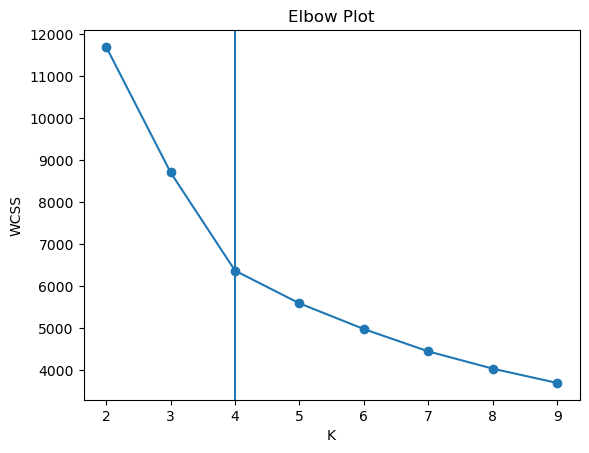

In [127]:
plt.plot(range(2,10),wcss,marker='o')
plt.axvline(x=4)
plt.title('Elbow Plot')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

From the elbow plot, it is evident that ideal value for k is 4. So let us build Kmeans clustering with k=4

In [129]:
final_model=KMeans(n_clusters=4,random_state=0)
final_model.fit(PCA_ds)

KMeans(n_clusters=4, random_state=0)

In [136]:
df['Label']=final_model.labels_

In [137]:
df

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     58138.0       58       635         88              546              172   
1     46344.0       38        11          1                6                2   
2     71613.0       26       426         49              127              111   
3     26646.0       26        11          4               20               10   
4     58293.0       94       173         43              118               46   
...       ...      ...       ...        ...              ...              ...   
2235  61223.0       46       709         43              182               42   
2236  64014.0       56       406          0               30                0   
2237  56981.0       91       908         48              217               32   
2238  69245.0        8       428         30              214               80   
2239  52869.0       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0                   88            88                  3                8  ...   
1                    1             6                  2                1  ...   
2                   21            42                  1                8  ...   
3                    3             5                  2                2  ...   
4                   27            15                  5                5  ...   
...                ...           ...                ...              ...  ...   
2235               118           247                  2                9  ...   
2236                 0             8                  7                8  ...   
2237                12            24                  1                2  ...   
2238                30            61                  2                6  ...   
2239                 1            21                  3                3  ...   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Children  Age  \
0                0             0         0         1         0   66   
1                0             0         0         0         2   69   
2                0             0         0         0         0   58   
3                0             0         0         0         1   39   
4                0             0         0         0         1   42   
...            ...           ...       ...       ...       ...  ...   
2235             0             0         0         0         1   56   
2236             1             0         0         0         3   77   
2237             0             0         0         0         0   42   
2238             0             0         0         0         1   67   
2239             0             0         0         1         2   69   

      Education_Postgraduate  Education_Undergraduate  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          1                        0   
...                      ...                      ...   
2235                       0                        0   
2236                       1                        0   
2237                       0                        0   
2238                       1                        0   
2239                       1                        0   

      Marital_Status_Together  Label  
0                           0      0  
1                           0      1  
2                           1      0  
3                           1      1  
4                           1      3  
...                       ...    ...  
2235                        1      0  
2236                        1      3  
2237                        0      3  
2238                        1      3  
2239                        1      3  

[2240 rows x 26 columns]

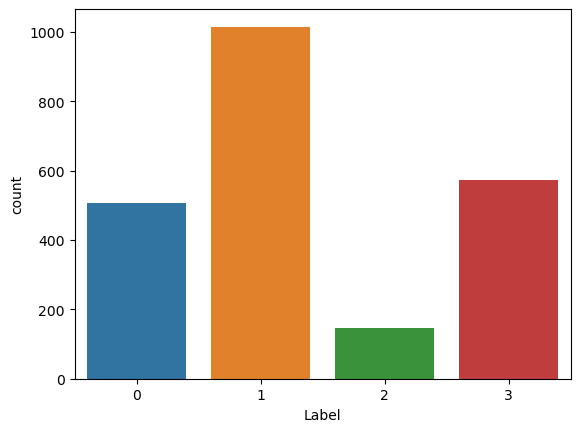

In [139]:
sns.countplot(x=df.Label)
plt.show()

In [144]:
PCA_ds['Label']=final_model.labels_

In [145]:
px.scatter_3d(data_frame=PCA_ds,
             x='PC0',
             y='PC1',
             z='PC2',
             color='Label')

The clusters are fairly distributed.

In [153]:
df[df.Label==0].describe().iloc[:,:17]

Income     Recency     MntWines   MntFruits  MntMeatProducts  \
count     507.000000  507.000000   507.000000  507.000000       507.000000   
mean    74097.042406   50.524655   509.848126   71.854043       426.597633   
std     29186.623566   29.423527   267.964326   49.504565       248.634182   
min      2447.000000    0.000000     1.000000    0.000000         3.000000   
25%     66778.000000   25.000000   313.500000   31.000000       247.500000   
50%     73059.000000   54.000000   466.000000   63.000000       391.000000   
75%     79844.000000   75.000000   678.000000  105.500000       556.500000   
max    666666.000000   99.000000  1449.000000  199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count       507.000000        507.000000    507.000000          507.00000   
mean        102.076923         72.412229     81.203156            1.57002   
std          65.251384         51.828862     61.680230            1.51818   
min           0.000000          0.000000      0.000000            0.00000   
25%          50.000000         32.000000     33.000000            1.00000   
50%          93.000000         60.000000     61.000000            1.00000   
75%         149.000000        107.000000    116.500000            2.00000   
max         259.000000        263.000000    362.000000           15.00000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count       507.000000           507.000000         507.000000   
mean          5.343195             5.680473           8.499014   
std           2.695438             3.013224           2.988367   
min           0.000000             0.000000           0.000000   
25%           4.000000             4.000000           6.000000   
50%           5.000000             5.000000           9.000000   
75%           7.000000             7.000000          11.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count         507.000000    507.000000    507.000000    507.000000   
mean            2.968442      0.049310      0.025641      0.088757   
std             1.845567      0.216728      0.158218      0.284674   
min             0.000000      0.000000      0.000000      0.000000   
25%             1.000000      0.000000      0.000000      0.000000   
50%             3.000000      0.000000      0.000000      0.000000   
75%             4.000000      0.000000      0.000000      0.000000   
max             9.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  
count    507.000000  
mean       0.078895  
std        0.269842  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [152]:
df[df.Label==1].describe().iloc[:,:17]

Income      Recency     MntWines    MntFruits  MntMeatProducts  \
count    1015.000000  1015.000000  1015.000000  1015.000000      1015.000000   
mean    34924.367488    49.414778    38.319212     5.100493        21.886700   
std     14535.623927    29.130130    49.461644     7.990487        22.517886   
min      1730.000000     0.000000     0.000000     0.000000         0.000000   
25%     25762.500000    24.000000     8.000000     0.000000         7.000000   
50%     34412.000000    49.000000    20.000000     2.000000        14.000000   
75%     42582.000000    76.000000    50.500000     6.000000        26.000000   
max    162397.000000    99.000000   691.000000    70.000000       137.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      1015.000000       1015.000000   1015.000000        1015.000000   
mean          7.419704          5.261084     15.266995           1.955665   
std          12.614885          7.972451     19.491784           1.317836   
min           0.000000          0.000000      0.000000           0.000000   
25%           0.500000          0.000000      4.000000           1.000000   
50%           3.000000          2.000000      9.000000           2.000000   
75%          10.000000          7.000000     20.000000           3.000000   
max         179.000000         78.000000    262.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      1015.000000          1015.000000        1015.000000   
mean          2.035468             0.536946           3.165517   
std           1.216554             0.746038           1.042581   
min           0.000000             0.000000           0.000000   
25%           1.000000             0.000000           3.000000   
50%           2.000000             0.000000           3.000000   
75%           3.000000             1.000000           4.000000   
max           8.000000             5.000000           8.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        1015.000000   1015.000000   1015.000000        1015.0   
mean            6.411823      0.071921      0.007882           0.0   
std             2.018127      0.258485      0.088472           0.0   
min             0.000000      0.000000      0.000000           0.0   
25%             5.000000      0.000000      0.000000           0.0   
50%             7.000000      0.000000      0.000000           0.0   
75%             8.000000      0.000000      0.000000           0.0   
max            20.000000      1.000000      1.000000           0.0   

       AcceptedCmp1  
count        1015.0  
mean            0.0  
std             0.0  
min             0.0  
25%             0.0  
50%             0.0  
75%             0.0  
max             0.0

In [151]:
df[df.Label==2].describe().iloc[:,:17]

Income     Recency     MntWines   MntFruits  MntMeatProducts  \
count     145.000000  145.000000   145.000000  145.000000       145.000000   
mean    80202.196552   45.917241   908.572414   48.131034       438.986207   
std     11807.251319   28.396866   336.846255   48.854412       271.339373   
min     37929.000000    0.000000   152.000000    0.000000        45.000000   
25%     74004.000000   22.000000   712.000000   17.000000       204.000000   
50%     82017.000000   43.000000   966.000000   28.000000       417.000000   
75%     88097.000000   70.000000  1126.000000   59.000000       673.000000   
max    105471.000000   99.000000  1493.000000  183.000000       974.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count       145.000000        145.000000    145.000000         145.000000   
mean         72.793103         55.862069     74.751724           1.193103   
std          63.353604         50.966986     61.322749           0.988100   
min           0.000000          0.000000      0.000000           0.000000   
25%          25.000000         19.000000     33.000000           1.000000   
50%          51.000000         38.000000     51.000000           1.000000   
75%         106.000000         88.000000    114.000000           1.000000   
max         250.000000        194.000000    245.000000           7.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count       145.000000           145.000000         145.000000   
mean          5.537931             6.082759           8.165517   
std           2.104957             2.462224           2.692618   
min           2.000000             2.000000           4.000000   
25%           4.000000             4.000000           6.000000   
50%           5.000000             6.000000           8.000000   
75%           7.000000             8.000000          10.000000   
max          11.000000            11.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count         145.000000    145.000000    145.000000    145.000000   
mean            3.496552      0.186207      0.524138      0.786207   
std             2.144515      0.390623      0.501148      0.411404   
min             1.000000      0.000000      0.000000      0.000000   
25%             2.000000      0.000000      0.000000      1.000000   
50%             3.000000      0.000000      1.000000      1.000000   
75%             5.000000      0.000000      1.000000      1.000000   
max             9.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  
count    145.000000  
mean       0.606897  
std        0.490133  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [150]:
df[df.Label==3].describe().iloc[:,:17]

Income     Recency     MntWines   MntFruits  MntMeatProducts  \
count    573.000000  573.000000   573.000000  573.000000       573.000000   
mean   56489.202443   48.123909   439.242583   18.029668       125.331588   
std    10904.236633   28.369201   270.693448   22.000973        87.828693   
min     4428.000000    0.000000    16.000000    0.000000         6.000000   
25%    49505.000000   24.000000   229.000000    3.000000        65.000000   
50%    57036.000000   48.000000   375.000000   10.000000       104.000000   
75%    64014.000000   71.000000   595.000000   24.000000       165.000000   
max    93404.000000   99.000000  1396.000000  142.000000       650.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count       573.000000        573.000000    573.000000         573.000000   
mean         24.813264         18.268761     54.282723           3.933682   
std          29.047797         23.945984     51.279029           2.363579   
min           0.000000          0.000000      0.000000           0.000000   
25%           6.000000          3.000000     17.000000           2.000000   
50%          15.000000         10.000000     37.000000           3.000000   
75%          36.000000         24.000000     73.000000           5.000000   
max         223.000000        157.000000    321.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count       573.000000           573.000000         573.000000   
mean          6.233857             2.890052           7.441536   
std           2.457564             1.947777           2.612936   
min           1.000000             0.000000           0.000000   
25%           4.000000             1.000000           5.000000   
50%           6.000000             2.000000           7.000000   
75%           8.000000             4.000000           9.000000   
max          25.000000            11.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count         573.000000    573.000000    573.000000    573.000000   
mean            5.914485      0.066318      0.122164      0.006981   
std             1.856198      0.249054      0.327761      0.083332   
min             0.000000      0.000000      0.000000      0.000000   
25%             5.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            10.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  
count    573.000000  
mean       0.027923  
std        0.164897  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

# Conclusion

In this task, I have performed unsupervised learning to segment customers into clusters based on their behavior and characteristics. Here I have used KMeans
algorithm to perform clustering on the dataset. This segmentation can help in planning better marketing strategies based on the type of customers.